In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from data.terra import iter_hps_env0, iter_hps_env0v2

In [5]:
iter_hps_env0.liter[0]

{'dir': 'erm203shhps0326terra',
 'e0_acc_soup': 0.55,
 'e0_ece_soup': 28.417,
 'e1_out_acc_soup': 0.94,
 'e1_out_ece_soup': 2.741,
 'e2_out_acc_soup': 0.919,
 'e2_out_ece_soup': 4.937,
 'e3_out_acc_soup': 0.888,
 'e3_out_ece_soup': 7.158,
 'length': 1,
 'out_acc_soup': 0.916,
 'out_ece_soup': 4.945,
 'swamember': 0,
 'trial_seed': 2}

In [6]:
iter_hps_env0v2.liter[0]["out_acc_soup"]

0.907

In [18]:
def get_lv1(trial):
    return [l for l in iter_hps_env0.liter if l["trial_seed"] == trial]
def get_lv2(trial):
    return [l for l in iter_hps_env0v2.liter if l["trial_seed"] == trial]

In [20]:
del get_l

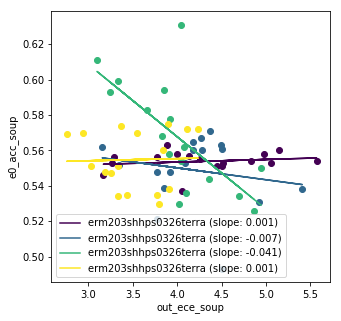

In [24]:
fig = plot_iter_dir("out_ece_soup", "e0_acc_soup", list_l=[get_lv1(0), get_lv1(1), get_lv1(2), get_lv1(-1)], labels=None)

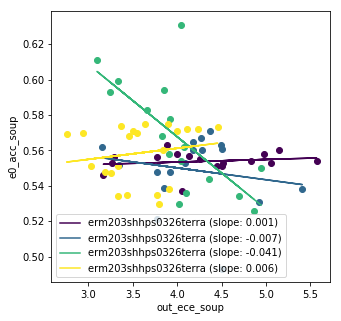

In [25]:
fig = plot_iter_dir("out_ece_soup", "e0_acc_soup", list_l=[get_lv2(0), get_lv2(1), get_lv2(2), get_lv2(-1)], labels=None)

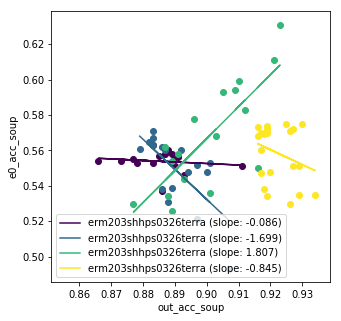

In [27]:
fig = plot_iter_dir("out_acc_soup", "e0_acc_soup", list_l=[get_lv2(0), get_lv2(1), get_lv2(2), get_lv2(-1)], labels=None)

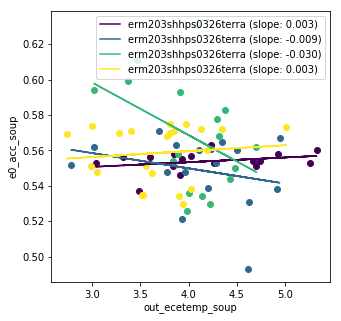

In [26]:
fig = plot_iter_dir("out_ecetemp_soup", "e0_acc_soup", list_l=[get_lv2(0), get_lv2(1), get_lv2(2), get_lv2(-1)], labels=None)

In [21]:
fig = plot_iter_dir("out_acc_soup", "e0_acc_soup", list_l=[get_l(0), get_l(1), get_l(2), get_l(-1)], labels=None)

NameError: name 'get_l' is not defined

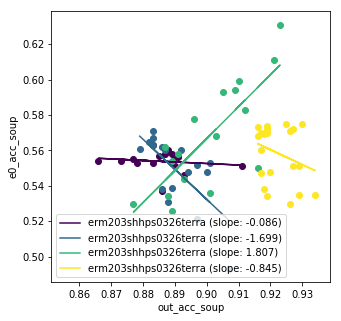

In [17]:
fig = plot_iter_dir("out_acc_soup", "e0_acc_soup", list_l=[get_l(0), get_l(1), get_l(2), get_l(-1)], labels=None)

In [ ]:
fig = plot_iter_dir("length", "e0_acc_soup", list_l=[get_l(0), get_l(1), get_l(2), get_l(-1)], labels=None)

In [ ]:
fig = plot_iter_dir("out_ece_soup", "e0_acc_soup", list_l=[liter], labels=None)

In [ ]:
fig = plot_iter_dir("out_ece_soup", "e0_acc_soup", list_l=[liter], labels=None)

In [ ]:
fig = plot_iter_dir("length", "e0_acc_soup", list_l=[liter], labels=None)

In [ ]:
fig = plot_iter_dir("length", "e3_acc_soup", list_l=[liter], labels=None)

In [ ]:
plt.scatter(m, dr, label="div preds.")
plt.scatter(m, df, label="div feats.")
plt.xlabel("Num networks M")
plt.ylabel("Slope")
plt.legend()

In [ ]:
leoa = liter_hpeoa.leoa[:60]
lsoup_hpd = liter_hpd.lsoup_hpd

In [ ]:
import matplotlib.pyplot as plt
def x(l, key):
    return [i[key] for i in l]# if i["thess"]<2200]

In [ ]:
from codeplot.plot import dict_key_to_label, get_x, dict_key_to_limit, plot_iter, plot_soup_soupswa


In [ ]:
from codeplot.plot import *

In [ ]:
dict_key_to_limit

In [ ]:
def merge(*ll):
    return [[y for x in l for y in x] for l in zip(*ll)]


def get_x(l, key):
    if "-" in key:
        return [i - j for i, j in zip(get_x(l, key.split("-")[0]), get_x(l, key.split("-")[1]))]
    else:
        return [i[key] for i in l if check_condition(i)]


def check_condition(i):
    if (DROP is not None and i.get("drop", DROP) != DROP):
        return False
    if (STEP is not None and i.get("step", STEP) != STEP):
        return False
    if (DIR is not None and i.get("step", DIR) != DIR)):
        return False
    return True


DIR = None
DROP = None
STEP = None


dict_key_to_label = {
    "length": "M (#nets)",
    "soupswa": "Acc. sw",
    "thess": "Train Flatness",
    "soup-netm": "$Acc(\\frac{1}{M}(\\sum \\theta_m)) - \\frac{1}{M}(\\sum Acc(\\theta_m))$",
    "df": "Div. features",
    "dr": "Div. predictions",
    "hess": "Flatness",
    "netm": "$\\frac{1}{M}(\\sum Acc(\\theta_m))$",
    "soup": "$Acc(\\frac{1}{M}(\\sum \\theta_m))$",
    "net": "$Acc(\\{\\theta_m)\\})$"
}

dict_key_to_limit = {
    "soup-netm": [0.04, 0.12],
    "df": [0.10, 0.40],
    "dr": [0.5, 0.8],
    "soup": [0.65, 0.705]
}


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)


def fit_and_plot(key1, key2, l, order, label, color):
    if order in [1, "1"]:
        m, b = np.polyfit(get_x(l, key1), get_x(l, key2), 1)
        plt.plot(
            get_x(l, key1),
            m * np.array(get_x(l, key1)) + b,
            color=color,
            label=label + " (slope: " + "{:.0f}".format(m * 1000) + ")"
        )
    elif order in [2, "2"]:
        m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 2)
        get_x1_sorted = sorted(get_x(l, key1))
        preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
        plt.plot(get_x1_sorted, preds, color=color)  # label="int."+label)
    elif order in [3, "3"]:
        m3, m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 3)
        get_x1_sorted = sorted(get_x(l, key1))
        preds = m3 * np.array(get_x1_sorted)**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(
            get_x1_sorted
        ) + b
        plt.plot(get_x1_sorted, preds, color=color)  # label="int."+label)
    elif order == "2log":
        m2, m1, b = np.polyfit(np.log(get_x(l, key1)), get_x(l, key2), 2)
        get_x1_sorted = np.log(sorted(get_x(l, key1)))
        preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
        plt.plot(sorted(get_x(l, key1)), preds, color=color)  # label="int."+label)
    elif order == "3log":
        m3, m2, m1, b = np.polyfit(np.log(get_x(l, key1)), get_x(l, key2), 3)
        get_x1_sorted = np.log(sorted(get_x(l, key1)))
        preds = m3 * np.array(get_x1_sorted)**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
        plt.plot(sorted(get_x(l, key1)), preds, color=color)  # label="int."+label)
    elif order in [0, -1, None, "", "0"]:
        return
    else:
        raise ValueError(order)

def plot_key(l, key1, key2, order=1, label="", labels=None, diag=False, markers=None, dict_key_to_limit={}):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, color, label, marker):
        t = get_x(l, key1)
        if t == []:
            return
        if marker is None:
            plt.scatter(get_x(l, key1), get_x(l, key2), color=color, label=(label if order != 1 else None), marker=marker)
        else:
            for xp, yp, m in zip(get_x(l, key1), get_x(l, key2), marker):
                plt.scatter(xp, yp, color=color, marker=m)
        fit_and_plot(key1, key2, l, order, label, color)

    colors = cm.rainbow(np.linspace(0, 1, len(l)))
    if labels is None:
        labels = [label + str(i) for i in range(len(l))]
    for card in range(len(l)):
        if l[card] == []:
            continue
        #print(card, l[card])
        if markers is not None:
            marker = markers[card]
        else:
            marker = None
        plot_with_int(l[card], color=colors[card], label=labels[card], marker=marker)
    if diag:
        xpoints = ypoints = plt.xlim()
        plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False, label="y=x")

    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if key2 in dict_key_to_limit:
        plt.ylim(dict_key_to_limit[key2])
    plt.legend()
# iter


def plot_iter(key1, key2, order=1, dict_key_to_limit={}):
    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, color, label):
        t = get_x(l, key1)
        if t == []:
            return
        plt.scatter(get_x(l, key1), get_x(l, key2), color=color, label=label if order != 1 else None)
        fit_and_plot(key1, key2, l, order, label, color)

    plot_with_int(l2, color="yellow", label="SOUP: $\\{\\theta_m\\}_1^M$ from different runs (HP Standard)")
    plot_with_int(
        leoa, color="grey", label="SOUP: $\\{\\theta_m\\}_1^M$ from different runs (HP=EoA)"
    )
    plot_with_int(l0, color="blue", label="SWA: $\\{\\theta_m\\}_1^M$ from same run")
    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if key2 in dict_key_to_limit:
        plt.ylim(dict_key_to_limit[key2])
    plt.legend()


def plot_soup_soupswa(key1, keys2, order=1, dict_key_to_limit={}):
    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label["soup"])

    def plot_with_int(l, color, label, key2):
        t = x(l, key1)
        if t == []:
            return
        plt.scatter(x(l, key1), get_x(l, key2), color=color, label=label if order != 1 else None)
        fit_and_plot(key1, key2, l, order, label, color)


    colors = ["blue", "yellow"]
    labels = [
        "SOUP: $\\{\\theta_m\\}_1^M$ last checkpoints from different runs",
        "SOUPSWA: $\\{\\theta_m\\}_1^M$ SWA from different runs"
    ]
    #plot_with_int(l0, color="grey", key2="soup", label="swa")
    for  i, key2 in enumerate(keys2):
        plot_with_int(l2, key2=key2, color=colors[i], label=labels[i])
    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if key2 in dict_key_to_limit:
        plt.ylim(dict_key_to_limit[key2])
    plt.legend()


In [ ]:

def plot_iter_2(key1, key2, order=1, dict_key_to_limit={}):
    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, color, label):
        t = get_x(l, key1)
        if t == []:
            return
        plt.scatter(get_x(l, key1), get_x(l, key2), color=color, label=label if order != 1 else None)
        fit_and_plot(key1, key2, l, order, label, color)

    plot_with_int(
        leoa[:50], color="yellow", label="SOUP: $\\{\\theta_m\\}_1^M$ from different runs"
    )
    plot_with_int(l0[:50], color="blue", label="SWA: $\\{\\theta_m\\}_1^M$ from same run")
    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if key2 in dict_key_to_limit:
        plt.ylim(dict_key_to_limit[key2])
    plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)

In [ ]:
dict_key_to_limit

In [ ]:
plot_iter("length", "soup", order="")

In [ ]:
plot_iter("length", "soupswa", order="",)

In [ ]:
plot_iter("length", "soup", order="2log")

In [ ]:
def plot_soup_soupswa(key1, keys2, order=1):
    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label["soup"])

    def plot_with_int(l, color, label, key2):
        t = x(l, key1)
        if t == []:
            return
        plt.scatter(x(l, key1), get_x(l, key2), color=color, label=label if order != 1 else None)
        fit_and_plot(key1, key2, l, order, label, color)


    colors = ["blue", "yellow"]
    labels = [
        "SOUP: $\\{\\theta_m\\}_1^M$ last checkpoints from different runs",
        "SOUPSWA: $\\{\\theta_m\\}_1^M$ SWA from different runs"
    ]
    #plot_with_int(l0, color="grey", key2="soup", label="swa")
    for  i, key2 in enumerate(keys2):
        plot_with_int(l2, key2=key2, color=colors[i], label=labels[i])

    plt.legend()

In [ ]:
plot_soup_soupswa("length", keys2=["soup", "soupswa"], order=2)

In [ ]:
plot_soup_soupswa("length", keys2=["soup", "soupswa"], order=2)

In [ ]:
plot_soup_soupswa("length", keys2=["hess", "thess"], order="2log")

In [ ]:
plot_key_swa("length", keys2=["soup", "soupswa"], order="2log")

In [ ]:
plot_key("length", "thess", order="2log")

In [ ]:
plot_key("thess", "soup")

In [ ]:
plot_key("length", "hess", order="2log")